In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data= pd.read_csv(r"C:\Users\talas\Downloads\train.csv")
data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [3]:
df1=data[data.Store==1]
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
df2=df1[df1.Dept==14]
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
1859,1,14,2010-02-05,19466.91,False
1860,1,14,2010-02-12,18129.02,True
1861,1,14,2010-02-19,17491.36,False
1862,1,14,2010-02-26,16118.26,False
1863,1,14,2010-03-05,18268.78,False


In [5]:
len(df2['Store'])

143

In [6]:
df2.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
1997,1,14,2012-09-28,12037.66,False
1998,1,14,2012-10-05,14381.21,False
1999,1,14,2012-10-12,11450.64,False
2000,1,14,2012-10-19,12035.51,False
2001,1,14,2012-10-26,11150.00,False


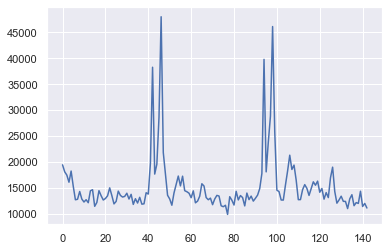

In [7]:
plt.plot(list(range(0,len(df2['Dept']))),df2['Weekly_Sales'])

In [8]:
df2['Date']=pd.to_datetime(df2['Date'],format = '%Y/%m/%d')
df2['Date']

<ipython-input-8-1ee31ee7cf6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date']=pd.to_datetime(df2['Date'],format = '%Y/%m/%d')


1859   2010-02-05
1860   2010-02-12
1861   2010-02-19
1862   2010-02-26
1863   2010-03-05
          ...    
1997   2012-09-28
1998   2012-10-05
1999   2012-10-12
2000   2012-10-19
2001   2012-10-26
Name: Date, Length: 143, dtype: datetime64[ns]

In [9]:
df3=pd.Series(df2['Weekly_Sales'].values,index=df2['Date'],name='am')
df3

Date
2010-02-05    19466.91
2010-02-12    18129.02
2010-02-19    17491.36
2010-02-26    16118.26
2010-03-05    18268.78
                ...   
2012-09-28    12037.66
2012-10-05    14381.21
2012-10-12    11450.64
2012-10-19    12035.51
2012-10-26    11150.00
Name: am, Length: 143, dtype: float64

In [10]:
df3_index=pd.DatetimeIndex(df3.index,freq=df3.index.inferred_freq)
df3.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

Text(0, 0.5, 'Weekly Sales')

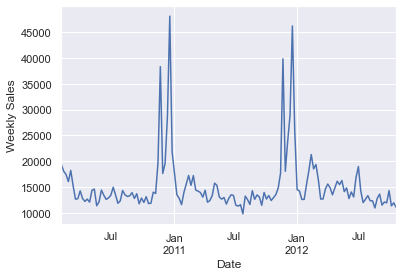

In [11]:
ax=df3.plot()
ax.set_ylabel('Weekly Sales')

<function matplotlib.pyplot.show(*args, **kw)>

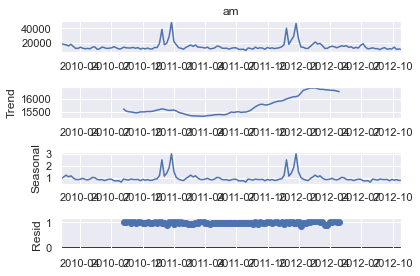

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3,model='multiplicative',period=52)
result.plot()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

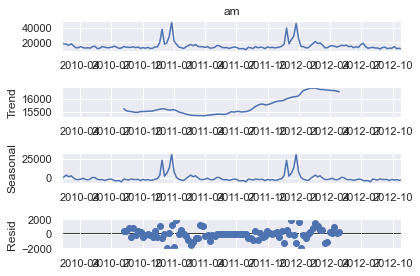

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3,model='additive',period=52)
result.plot()
plt.show

In [14]:
# KPSS Test to check stationarity of the time series

# H0 - Time Series is stationary
# H1 - Time Series is non-stationary


In [15]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical_values = kpss(df3)


C:\Users\talas\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\talas\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [16]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'critical_values: {critical_values}')

if p <0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

Test Statistics: 0.062452221324914625
p-value: 0.1
critical_values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary


In [17]:
# ADF test to check stationarity

# H0 - Time Series is non-stationary
# H1 - Time Series is stationary

In [18]:
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(df3,autolag = 'AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'    {key}, {value}')


ADF Statistic: -4.1474263526710855
p-value: 0.0008077316503793811
Critical Values:
    1%, -3.47864788917503
Critical Values:
    5%, -2.882721765644168
Critical Values:
    10%, -2.578065326612056


In [19]:
# ACF and PACF Plots

In [20]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\talas\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


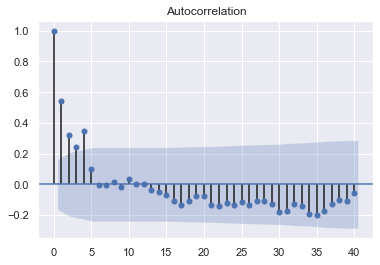

In [21]:
acf=sm.tsa.acf(df3,nlags=6)
acf

plot_acf(df3, lags=40)
plt.show()

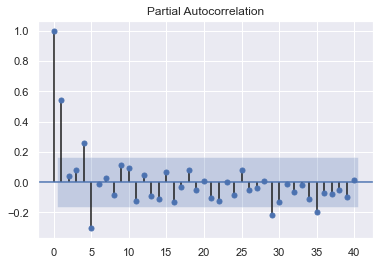

In [22]:
pacf=sm.tsa.pacf(df3,nlags=6)
pacf

plot_pacf(df3, lags=40)
plt.show()

In [23]:
from pmdarima import auto_arima

In [24]:
arima_model = auto_arima(df3,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,
                         start_P=0,D=0,start_Q=0,max_P=5,max_D=5,max_Q=5,m=52,
                         seasonal=True,trace=True,supress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=2848.378, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=2846.398, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=2800.669, Time=0.60 sec
 ARIMA(0,1,0)(2,0,1)[52] intercept   : AIC=inf, Time=12.15 sec
 ARIMA(0,1,0)(1,0,2)[52] intercept   : AIC=2737.849, Time=11.39 sec
 ARIMA(0,1,0)(0,0,2)[52] intercept   : AIC=inf, Time=13.11 sec
 ARIMA(0,1,0)(2,0,2)[52] intercept   : AIC=2804.674, Time=3.02 sec
 ARIMA(0,1,0)(1,0,3)[52] intercept   : AIC=inf, Time=36.11 sec
 ARIMA(0,1,0)(0,0,3)[52] intercept   : AIC=inf, Time=35.04 sec
 ARIMA(0,1,0)(2,0,3)[52] intercept   : AIC=inf, Time=48.56 sec
 ARIMA(1,1,0)(1,0,2)[52] intercept   : AIC=inf, Time=13.13

In [25]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  143
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2], 52)   Log Likelihood               -1363.925
Date:                                 Mon, 02 May 2022   AIC                           2737.849
Time:                                         21:36:28   BIC                           2752.628
Sample:                                              0   HQIC                          2743.855
                                                 - 143                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -67.8128    114.950     -0.590      0.555    -293.111     157.485
ar.S.L52       0.9510      0.073     13.056      0.000       0.808       1.094
ma.S.L52      -0.2342      0.164     -1.431      0.153      -0.555       0.087
ma.S.L104     -0.0784      0.524     -0.150      0.881      -1.106       0.949
sigma2      7.138e+06      0.019   3.77e+08      0.000    7.14e+06    7.14e+06
===================================================================================
Ljung-Box (Q):                       57.68   Jarque-Bera (JB):               391.03
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -1.30
Prob(H) (two-sided):                  0.18   Kurtosis:                        10.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.3e+23. Standard errors may be unstable.
"""

In [26]:
list(arima_model.predict(39))

[11850.26765887234,
 12627.285088241313,
 15691.836830598259,
 35054.62297199217,
 15316.648936877638,
 19780.150608861637,
 24934.83243807444,
 40955.19761089797,
 21292.899927324797,
 12124.929624677845,
 11083.80510613013,
 9643.799467087123,
 9307.45123399065,
 13378.402156048238,
 15235.528656633833,
 17406.666978865833,
 14989.761594978527,
 15896.44965102442,
 13130.238481852622,
 10006.29992387265,
 9893.637039892465,
 11251.336406680113,
 11808.828080024214,
 10905.037667891756,
 9897.756627237202,
 10779.64147389035,
 12075.913122967759,
 11478.854150963754,
 11389.619069118822,
 9778.710258735084,
 10463.518537309548,
 8657.991018309567,
 9475.591028598994,
 8774.467418391761,
 11455.352206481568,
 12823.00943742452,
 9159.772780684254,
 7284.985574507773,
 7512.988202077878]

In [29]:
predicted = pd.read_csv(r"C:\Users\talas\Downloads\predicted.csv")
predicted

,Date,Weekly_Sales
0,2012-11-02,11850.2600
1,2012-11-09,12627.2800
2,2012-11-16,15691.8300
3,2012-11-23,35054.6200
4,2012-11-30,15316.6400
5,2012-12-07,19780.1500
6,2012-12-14,24934.8300
7,2012-12-21,40955.1900
8,2012-12-28,21292.8900
9,2013-01-04,12124.9200


In [30]:
predicted['Date']=pd.to_datetime(predicted['Date'],format = '%Y/%m/%d')
predicted['Date']

0    2012-11-02
1    2012-11-09
2    2012-11-16
3    2012-11-23
4    2012-11-30
5    2012-12-07
6    2012-12-14
7    2012-12-21
8    2012-12-28
9    2013-01-04
10   2013-01-11
11   2013-01-18
12   2013-01-25
13   2013-02-01
14   2013-02-08
15   2013-02-15
16   2013-02-22
17   2013-03-01
18   2013-03-08
19   2013-03-15
20   2013-03-22
21   2013-03-29
22   2013-04-05
23   2013-04-12
24   2013-04-19
25   2013-04-26
26   2013-05-03
27   2013-05-10
28   2013-05-17
29   2013-05-24
30   2013-05-31
31   2013-06-07
32   2013-06-14
33   2013-06-21
34   2013-06-28
35   2013-07-05
36   2013-07-12
37   2013-07-19
38   2013-07-26
Name: Date, dtype: datetime64[ns]

In [31]:
df5=pd.Series(predicted['Weekly_Sales'].values,index=predicted['Date'],name='am')
df5

Date
2012-11-02    11850.2600
2012-11-09    12627.2800
2012-11-16    15691.8300
2012-11-23    35054.6200
2012-11-30    15316.6400
2012-12-07    19780.1500
2012-12-14    24934.8300
2012-12-21    40955.1900
2012-12-28    21292.8900
2013-01-04    12124.9200
2013-01-11    11083.8000
2013-01-18     9643.7900
2013-01-25     9307.4500
2013-02-01    13378.4000
2013-02-08    15235.5200
2013-02-15    17406.6600
2013-02-22    14989.7600
2013-03-01    15896.4400
2013-03-08    13130.2300
2013-03-15    10006.2900
2013-03-22     9893.6300
2013-03-29    11251.3300
2013-04-05    11808.8200
2013-04-12    10905.0370
2013-04-19     9897.7500
2013-04-26    10779.6400
2013-05-03    12075.9100
2013-05-10    11478.8500
2013-05-17    11389.6100
2013-05-24     9778.7100
2013-05-31    10463.5100
2013-06-07     8657.9900
2013-06-14     9475.5900
2013-06-21     8774.4670
2013-06-28    11455.3500
2013-07-05    12823.0090
2013-07-12     9159.7720
2013-07-19     7284.9856
2013-07-26     7512.9800
Name: am, dtype: flo

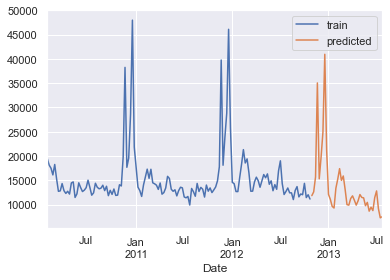

In [40]:
# Forecast plot usinf SARIMA

df3.plot(label='train')
df5.plot(label='predicted')

plt.legend()
plt.show()

In [41]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

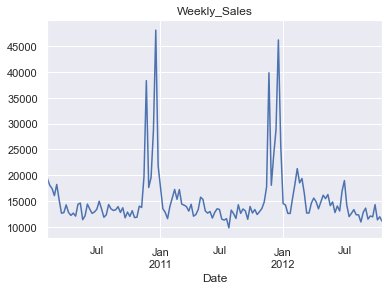

In [43]:
# plotting the original data
df3.plot(title='Weekly_Sales')

In [ ]:
# SINGLE EXPONENTIAL SMOOTHING

In [50]:
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)
df3.index.freq = 'W-FRI'

# Split into train and test set
train_df3 = df3[:120]
test_df3 = df3[120:]

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

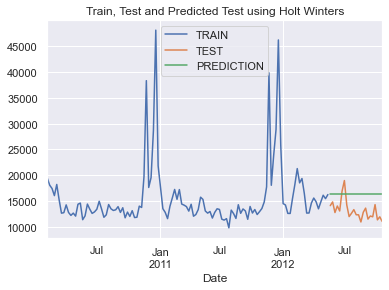

In [51]:
fitted_model=SimpleExpSmoothing(train_df3).fit(smoothing_level=alpha,optimized=False,use_brute=True)
test_predictions = fitted_model.forecast(23)
train_df3.plot(legend=True,label='TRAIN')
test_df3.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

Text(0.5, 1.0, 'Single Exponential Smoothing')

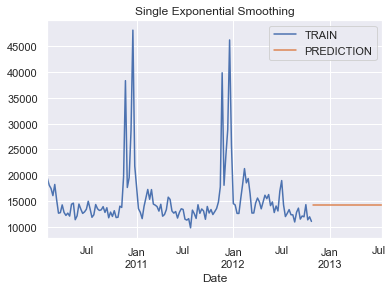

In [52]:
# Forecast next 38 week sales using SES

fitted_model=SimpleExpSmoothing(df3).fit(smoothing_level=alpha,optimized=False,use_brute=True)
test_predictions = fitted_model.forecast(38)
df3.plot(legend=True,label='TRAIN')
#test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Single Exponential Smoothing')

In [ ]:
# DOUBLE EXPONENTIAL SMOOTHING

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

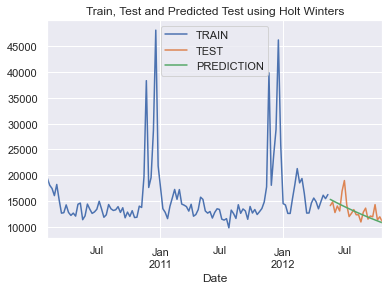

In [55]:
fitted_model = ExponentialSmoothing(train_df3,trend='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(23)
train_df3.plot(legend=True,label='TRAIN')
test_df3.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

Text(0.5, 1.0, ' Double Exponential Smoothing')

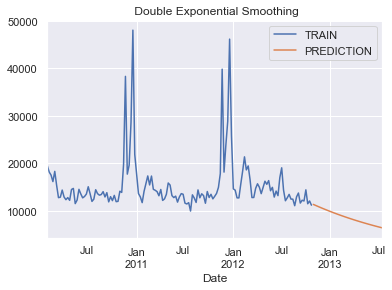

In [56]:
# Forecast next 38 week sales using DES

fitted_model= ExponentialSmoothing(df3,trend='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(38)
df3.plot(legend=True,label='TRAIN')
#test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title(' Double Exponential Smoothing')

In [ ]:
# TRIPLE EXPONENTIAL SMOOTHING

C:\Users\talas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

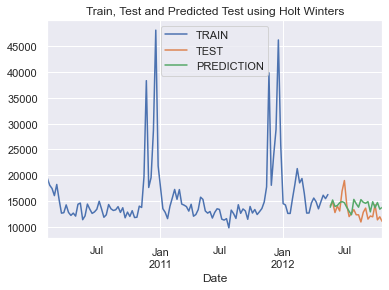

In [57]:
fitted_model = ExponentialSmoothing(train_df3,trend='mul',seasonal='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(23)
train_df3.plot(legend=True,label='TRAIN')
test_df3.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

C:\Users\talas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


Text(0.5, 1.0, 'Holt Winters Triple Exponential Smoothing')

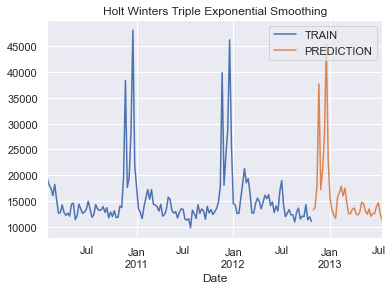

In [58]:
# Forecast next 38 week sales using TES

fitted_model= ExponentialSmoothing(df3,trend='mul',seasonal='mul',seasonal_periods=52).fit()
test_predictions = fitted_model.forecast(38)
df3.plot(legend=True,label='TRAIN')
#test_df4['Weekly_Sales'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Holt Winters Triple Exponential Smoothing')